# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pytemperature
import datetime


# Import API key
from api_keys import api_key
api_key = "47a71dbc8733b8def36923b6244e10c5"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [109]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['port alfred', 'rikitea', 'hilo', 'talnakh', 'ramshir', 'lagoa', 'caravelas', 'leesburg', 'srednekolymsk', 'whitehorse', 'tsiroanomandidy', 'butaritari', 'avera', 'biak', 'yuryevets', 'isabela', 'albany', 'adrar', 'castro', 'cape town', 'esperance', 'deputatskiy', 'ushuaia', 'faya', 'naftah', 'punta arenas', 'pevek', 'saldanha', 'uige', 'saint-georges', 'torbay', 'kodiak', 'hualmay', 'wad madani', 'hermanus', 'beringovskiy', 'new norfolk', 'patacamaya', 'amderma', 'pran buri', 'taburi', 'itarema', 'dasoguz', 'port hardy', 'nanortalik', 'tasiilaq', 'ancud', 'bambous virieux', 'hobart', 'homer', 'dikson', 'anori', 'bluff', 'desaguadero', 'grand centre', 'kizukuri', 'dingle', 'coquimbo', 'geraldton', 'marsh harbour', 'hithadhoo', 'mahebourg', 'narsaq', 'wasilla', 'atar', 'svetlaya', 'tuktoyaktuk', 'novyy urgal', 'saint-philippe', 'kapaa', 'vardo', 'key largo', 'illoqqortoormiut', 'upernavik', 'yellowknife', 'malwan', 'kikwit', 'mayumba', 'lebu', 'simpang', 'troitsko-pechorsk', 'clyde riv

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [110]:
#url = "api.openweathermap.org/data/2.5/weather?q={city_name}"

#url = "api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=47a71dbc8733b8def36923b6244e10c5

print('Beginning Data Retrieval')
print('-----------------------------')

#Setting records.
x = 0
#Setting sets.
y = 1

#Loop through list of cities.
for city in cities:
    city_name = city
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city_name + "&APPID=" + api_key
    
    #if the city is in the list, grab the JSON.
    try:
            response = requests.get(url)
            response_json = response.json()
            print(f'Processing Record {x} of Set {y} | {city_name}')
    #if it's not, print that the city is not found.
    except:
            print(f'Skipping... {city_name} is not found.')
    
    #jump to the next record.
    x = x + 1
    
    #I only want 50 records per set. Once I reach 50, jump to the next set.
    if x == 50:
        y = y+1
        x = 0
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | port alfred
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | ramshir
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | caravelas
Processing Record 7 of Set 1 | leesburg
Processing Record 8 of Set 1 | srednekolymsk
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | tsiroanomandidy
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | avera
Processing Record 13 of Set 1 | biak
Processing Record 14 of Set 1 | yuryevets
Processing Record 15 of Set 1 | isabela
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | adrar
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | deputatskiy
Processing Record 22 of Set 1 | ushuaia
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [111]:
foundcities = []
clouds = []
countries = []
dates = []
hums = []
lats = []
longs = []
maxtemps = []
winds = []
        
for city in cities:
    city_name = city
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city_name + "&APPID=" + api_key
    
        #if the city is in the list, grab the JSON.
    try:
        response = requests.get(url)
        response_json = response.json()

        #Cloudiness retreival
        cloud_response = response_json['clouds']['all']
        clouds.append(cloud_response)

        #Country retrival
        country_response = response_json['sys']['country']
        countries.append(country_response)

        #Date retrival
        date_response = response_json['dt']
        dateconverted = datetime.datetime.fromtimestamp(date_response).strftime('%Y-%m-%d')
        dates.append(dateconverted)
        
        #Humidity retrival
        hum_response = response_json['main']['humidity']
        hums.append(hum_response)

        #Lat retrival
        lat_response = response_json['coord']['lat']
        lats.append(lat_response)

        #Lng retrival
        lng_response = response_json['coord']['lon']
        longs.append(lng_response)

        #Max Temp retrival
        max_temp_response = response_json['main']['temp_max']
        max_temp_response = pytemperature.k2f(max_temp_response ) # Kelvin to Fahrenheit
        maxtemps.append(max_temp_response)

        #Wind Speed retrival
        wind_speed_response= response_json['wind']['speed']
        winds.append(wind_speed_response)
        
        foundcities.append(city)
    except:
        print(f'Skipping... {city} not found.')
        
#confirming that all lists are the same length.
print(len(clouds))
print(len(winds))
print(len(foundcities))

Skipping... naftah not found.
Skipping... wad madani not found.
Skipping... amderma not found.
Skipping... taburi not found.
Skipping... grand centre not found.
Skipping... illoqqortoormiut not found.
Skipping... malwan not found.
Skipping... bengkulu not found.
Skipping... taolanaro not found.
Skipping... marcona not found.
Skipping... maykain not found.
Skipping... jiroft not found.
Skipping... belushya guba not found.
Skipping... mys shmidta not found.
Skipping... rolim de moura not found.
Skipping... kazalinsk not found.
Skipping... urdzhar not found.
Skipping... sinkat not found.
Skipping... samalaeulu not found.
Skipping... barentsburg not found.
Skipping... yefira not found.
Skipping... toliary not found.
Skipping... hurghada not found.
Skipping... vaitupu not found.
Skipping... puerto pinasco not found.
Skipping... grand river south east not found.
Skipping... tumannyy not found.
Skipping... tsihombe not found.
Skipping... severnyy not found.
Skipping... ruatoria not found.
Ski

In [120]:
#create a bunch of lists and then store them to a df
df = pd.DataFrame({'City': foundcities,
                   'Cloudiness': clouds,
                   'Country' : countries,
                   'Date' : dates,
                   'Humiditity': hums,
                   'Latitude': lats,
                   'Longitude': longs,
                   'Max Temp': maxtemps,
                   'Wind Speed': winds})
df.to_csv('../Homework_Outputs/city_weather_data')
df

,City,Cloudiness,Country,Date,Humiditity,Latitude,Longitude,Max Temp,Wind Speed
0,port alfred,20,ZA,2019-04-07,90,-33.59,26.89,64.97,2.68
1,rikitea,32,PF,2019-04-07,100,-23.12,-134.97,77.13,3.71
2,hilo,1,US,2019-04-07,64,19.71,-155.08,74.98,3.51
3,talnakh,88,RU,2019-04-07,94,69.49,88.39,19.53,2.31
4,ramshir,90,IR,2019-04-07,57,30.89,49.41,80.58,3.10
5,lagoa,20,PT,2019-04-07,93,37.14,-8.45,60.98,7.70
6,caravelas,0,BR,2019-04-07,96,-17.73,-39.27,83.16,6.11
7,leesburg,90,US,2019-04-07,56,39.12,-77.56,72.98,6.20
8,srednekolymsk,44,RU,2019-04-07,89,67.46,153.71,5.94,1.21
9,whitehorse,75,CA,2019-04-07,74,60.72,-135.06,35.98,8.20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

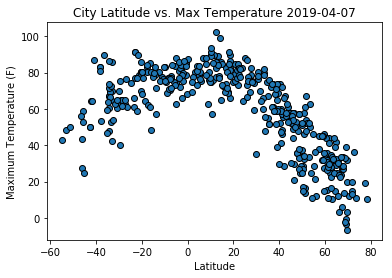

In [121]:
#Latitude vs. Max temperature
x = lats
y = maxtemps

plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title(f'City Latitude vs. Max Temperature {dates[0]}')
plt.scatter(x, y, edgecolors='black')
plt.savefig('../Homework_Outputs/lat_temp.png')

#### Latitude vs. Humidity Plot

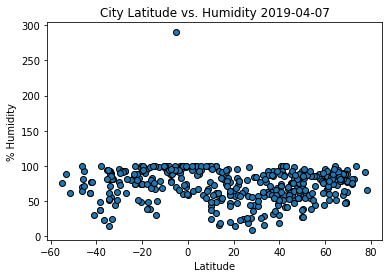

In [122]:
x = lats
y = hums

plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title(f'City Latitude vs. Humidity {dates[0]}')
plt.scatter(x, y, edgecolors='black')
plt.savefig('../Homework_Outputs/lat_hum.png')

#### Latitude vs. Cloudiness Plot

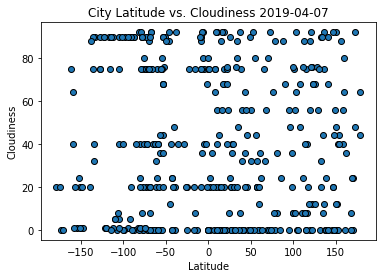

In [123]:
x = longs
y = clouds

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f'City Latitude vs. Cloudiness {dates[0]}')
plt.scatter(x, y, edgecolors='black')
plt.savefig('../Homework_Outputs/lat_cloud.png')

#### Latitude vs. Wind Speed Plot

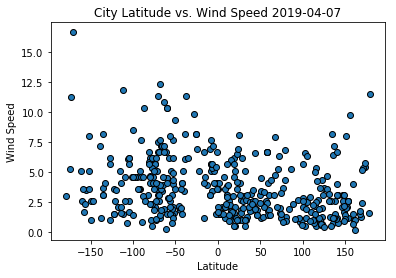

In [124]:
x = longs
y = winds

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f'City Latitude vs. Wind Speed {dates[0]}')
plt.scatter(x, y, edgecolors='black')
plt.savefig('../Homework_Outputs/lat_wind.png')